We first need to read in the data and see how it looks like

In [3]:
# please make sure that the data is located in the data folder under the current sirectory where you put your file

# first we should import all necessary packages
import numpy as np
import pandas as pd
import _pickle as cp

### As in the paper we should first randomly divide the observations into equally sized training and data sets


In [4]:
raw = pd.read_csv("peru_for_ml_course.csv")
raw.info() # just to see how many different variables we have 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46305 entries, 0 to 46304
Data columns (total 81 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   lnpercapitaconsumption   23153 non-null  float64
 1   d_fuel_other             46305 non-null  int64  
 2   d_fuel_wood              46305 non-null  int64  
 3   d_fuel_coal              46305 non-null  int64  
 4   d_fuel_kerosene          46305 non-null  int64  
 5   d_fuel_gas               46305 non-null  int64  
 6   d_fuel_electric          46305 non-null  int64  
 7   d_fuel_none              46305 non-null  int64  
 8   d_water_other            46305 non-null  int64  
 9   d_water_river            46305 non-null  int64  
 10  d_water_well             46305 non-null  int64  
 11  d_water_truck            46305 non-null  int64  
 12  d_water_pylon            46305 non-null  int64  
 13  d_water_outside          46305 non-null  int64  
 14  d_water_inside        

In [267]:
raw.percapitaconsumption.max() # in case you want to see all the data

7030.769

In [6]:
np.random.seed(1234) # as far as I undertand so that the results are exactly the same for everyone we set
# the speudo-random seed generator

In [7]:
# set X as exogenous variable and y as endogenous
additional = ['training', 'percapitaconsumption', 'poor', 'h_hhsize',
       'id_for_matlab', 'hhid', 'lncaphat_OLS', 'percapitahat_OLS']
exogenous_data = ['d_fuel_other', 'd_fuel_wood', 'd_fuel_coal',
       'd_fuel_kerosene', 'd_fuel_gas', 'd_fuel_electric', 'd_fuel_none',
       'd_water_other', 'd_water_river', 'd_water_well', 'd_water_truck',
       'd_water_pylon', 'd_water_outside', 'd_water_inside', 'd_drain_none',
       'd_drain_river', 'd_drain_cesspool', 'd_drain_septic',
       'd_drain_outside', 'd_drain_inside', 'd_wall_other', 'd_wall_woodmat',
       'd_wall_stonemud', 'd_wall_quincha', 'd_wall_tapia', 'd_wall_adobe',
       'd_wall_stonecement', 'd_wall_brickcement', 'd_roof_other',
       'd_roof_straw', 'd_roof_mat', 'd_roof_platecane', 'd_roof_tile',
       'd_roof_wood', 'd_roof_concrete', 'd_floor_other', 'd_floor_earth',
       'd_floor_cement', 'd_floor_wood', 'd_floor_tile', 'd_floor_sheets',
       'd_floor_parquet', 'd_electricity', 'd_telephone', 'd_h_educ_none',
       'd_h_educ_pre', 'd_h_educ_prim', 'd_h_educ_sec',
       'd_h_educ_higher_nouni', 'd_h_educ_higher_uni', 'd_h_educ_post',
       'd_max_educ_none', 'd_max_educ_prim', 'd_max_educ_sec',
       'd_max_educ_higher_nouni', 'd_max_educ_higher_uni', 'd_insurance_0',
       'd_insurance_1', 'd_insurance_2', 'd_insurance_3', 'd_insurance_4plus',
       'd_crowd_lessthan1', 'd_crowd_1to2', 'd_crowd_2to4', 'd_crowd_4to6',
       'd_crowd_6plus', 'd_lux_0', 'd_lux_1', 'd_lux_2', 'd_lux_3', 'd_lux_4',
       'd_lux_5']

y = raw.lnpercapitaconsumption
X = raw[exogenous_data]

In [8]:
# The function splits the dataset into the training dataset and the test dataset.
# The parameter split_coeff is a percentage value such that
# the first split_coeff of the dataset goes to the training dataset, 
# and the remaining data goes to the test dataset.
def split_data(X, y, split_coeff):
    N, _ = X.shape # get the number of records (rows)
    test_size = int(split_coeff * N) # use the first split_coeff of the data as the test data
    X_test = X[:test_size] # the first training_size records
    y_test = y[:test_size]
    X_train = X[test_size:] # the last test_size records
    y_train = y[test_size:]
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = split_data(X, y, 0.5) # use 50% of the data as training data

# check the size of the splitted dataset
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (23153, 72)
Shape of y_train: (23153,)
Shape of X_test: (23152, 72)
Shape of y_test: (23152,)


In [9]:
y_test

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
23147   NaN
23148   NaN
23149   NaN
23150   NaN
23151   NaN
Name: lnpercapitaconsumption, Length: 23152, dtype: float64

In [10]:
data_train = X_train
data_train["lnpercapitaconsumption"] = y_train
data_train
print(' + '.join(exogenous_data))

d_fuel_other + d_fuel_wood + d_fuel_coal + d_fuel_kerosene + d_fuel_gas + d_fuel_electric + d_fuel_none + d_water_other + d_water_river + d_water_well + d_water_truck + d_water_pylon + d_water_outside + d_water_inside + d_drain_none + d_drain_river + d_drain_cesspool + d_drain_septic + d_drain_outside + d_drain_inside + d_wall_other + d_wall_woodmat + d_wall_stonemud + d_wall_quincha + d_wall_tapia + d_wall_adobe + d_wall_stonecement + d_wall_brickcement + d_roof_other + d_roof_straw + d_roof_mat + d_roof_platecane + d_roof_tile + d_roof_wood + d_roof_concrete + d_floor_other + d_floor_earth + d_floor_cement + d_floor_wood + d_floor_tile + d_floor_sheets + d_floor_parquet + d_electricity + d_telephone + d_h_educ_none + d_h_educ_pre + d_h_educ_prim + d_h_educ_sec + d_h_educ_higher_nouni + d_h_educ_higher_uni + d_h_educ_post + d_max_educ_none + d_max_educ_prim + d_max_educ_sec + d_max_educ_higher_nouni + d_max_educ_higher_uni + d_insurance_0 + d_insurance_1 + d_insurance_2 + d_insurance_

<ipython-input-10-2dcadb0b95ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train["lnpercapitaconsumption"] = y_train


In [290]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#X_train = sm.add_constant(X_train)

# Compact version with confidence intervals
x = exogenous_data
model = smf.ols("lnpercapitaconsumption ~ d_fuel_other + d_fuel_wood + d_fuel_coal + d_fuel_kerosene + d_fuel_gas + d_fuel_electric + d_fuel_none + d_water_other + d_water_river + d_water_well + d_water_truck + d_water_pylon + d_water_outside + d_water_inside + d_drain_none + d_drain_river + d_drain_cesspool + d_drain_septic + d_drain_outside + d_drain_inside + d_wall_other + d_wall_woodmat + d_wall_stonemud + d_wall_quincha + d_wall_tapia + d_wall_adobe + d_wall_stonecement + d_wall_brickcement + d_roof_other + d_roof_straw + d_roof_mat + d_roof_platecane + d_roof_tile + d_roof_wood + d_roof_concrete + d_floor_other + d_floor_earth + d_floor_cement + d_floor_wood + d_floor_tile + d_floor_sheets + d_floor_parquet + d_electricity + d_telephone + d_h_educ_none + d_h_educ_pre + d_h_educ_prim + d_h_educ_sec + d_h_educ_higher_nouni + d_h_educ_higher_uni + d_h_educ_post + d_max_educ_none + d_max_educ_prim + d_max_educ_sec + d_max_educ_higher_nouni + d_max_educ_higher_uni + d_insurance_0 + d_insurance_1 + d_insurance_2 + d_insurance_3 + d_insurance_4plus + d_crowd_lessthan1 + d_crowd_1to2 + d_crowd_2to4 + d_crowd_4to6 + d_crowd_6plus + d_lux_0 + d_lux_1 + d_lux_2 + d_lux_3 + d_lux_4 + d_lux_5", data_train).fit()
#model.summary().tables[1]
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     lnpercapitaconsumption   R-squared:                       0.656
Model:                                OLS   Adj. R-squared:                  0.655
Method:                     Least Squares   F-statistic:                     683.9
Date:                    Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                            18:17:29   Log-Likelihood:                -13433.
No. Observations:                   22674   AIC:                         2.699e+04
Df Residuals:                       22610   BIC:                         2.751e+04
Df Model:                              63                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [291]:
lnCapOLSnew = model.predict(X)
(lnCapOLSnew - raw.lncaphat_OLS).describe()

count    4.537800e+04
mean     8.266197e-09
std      3.198668e-07
min     -7.546989e-07
25%     -2.428345e-07
50%      1.296096e-08
75%      2.557166e-07
max      7.583804e-07
dtype: float64

As far as I can see certain coefficient are very close to what they report in the online appendix (please also check some coefficient ). However some of those that they report as negative, we have positive which is quite weird to my opinion

### Step 1 - trying to reporoduce Figure 3 "Predited versus actual per-capita Consumption for Housholds in Test Set Data"

In [292]:
# first we need the predicted values of y_train
y_predicted = model.predict()
len(y_predicted)

22674

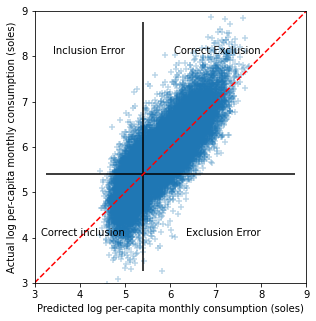

In [275]:
import matplotlib.pyplot as plt

lim_start = 3
lim_end = 9
plt.figure(1,figsize = (5,5))
g=plt.scatter(y_predicted, data_train.dropna(axis=0)["lnpercapitaconsumption"],alpha = 0.3, marker = '+')
#g.axes.set_yscale('log')
#g.axes.set_xscale('log')
plt.plot([lim_start, lim_end], [lim_start, lim_end], 'k--', color = 'r')
plt.hlines(np.percentile(y_predicted,28), lim_start+0.25, lim_end-0.25)
plt.vlines(np.percentile(y_predicted,28), lim_start+0.25, lim_end-0.25)
g.axes.set_xlabel('Predicted log per-capita monthly consumption (soles)')
g.axes.set_ylabel('Actual log per-capita monthly consumption (soles)')
g.axes.axis('equal')
g.axes.axis('square')
plt.text(5, 4, 'Correct inclusion',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)
plt.text(5, 8, 'Inclusion Error',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)
plt.text(8, 8, 'Correct Exclusion',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)
plt.text(8, 4, 'Exclusion Error',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)

plt.xlim([lim_start, lim_end])
plt.ylim([lim_start, lim_end])

plt.savefig('inex_OLS.png')

In [27]:
# calculate inclusion exclusion error
level = 6
input_data = data_train.dropna(axis=0)["lnpercapitaconsumption"].to_frame()
input_data["prediction"] = y_predicted

actual_threshold = (input_data["lnpercapitaconsumption"] < level)
predicted_threshold = (y_predicted > level)
z = np.logical_and(actual_threshold,predicted_threshold)
len(z[z == True]) / len(data_train.dropna(axis=0)["lnpercapitaconsumption"])

0.0878539296110082

In [28]:
y = data_train.dropna(axis=0)["lnpercapitaconsumption"].to_frame() 

In [30]:
predicted_threshold = np.zeros(len(y))

In [334]:
# lets make a function to calculate inclusion/exclusion error and correct inclusion/exlusion

def inex(predicted, actual, level, incl: bool, err: bool):
     
    #the funciton takes in 5 values and returns one value
    #predicted - should be an array of predicted y values according to the model that you used
    #actual - actual values of a training or testing data set, as a dataframe with an index
    #level - scalar which is used to determining the threshold 
    
    
    predicted_threshold = np.zeros(len(y))
    
    if incl is True:
        predicted_threshold = (predicted < np.percentile(predicted,level))
    else:
        predicted_threshold = (predicted > np.percentile(predicted,level))
    
    actual_threshold = np.zeros(len(y))
    
    if err is True and incl is True:
        actual_threshold = (actual > np.percentile(actual,28))
    elif err is True and incl is False:
        actual_threshold = (actual < np.percentile(actual,28))
    elif err is False and incl is False:
        actual_threshold = (actual > np.percentile(actual,28))
    else:
        actual_threshold = (actual < np.percentile(actual,28))
    
        
    data = pd.DataFrame(index = range(0,len(predicted)), columns = ["actual","predicted"])
    data["actual"] = actual_threshold.values
    data["predicted"] = predicted_threshold
    
    z = np.logical_and(data["actual"], data["predicted"])
    value = len(z[z == True]) / len(predicted)
    
    return value

In [18]:
incl = False
err = False
predicted = y_predicted
actual = y
predicted_threshold = np.zeros(len(y))
    
if incl is True:
    predicted_threshold = (predicted < level)
    
else:
    predicted_threshold = (predicted > level)
    
actual_threshold = np.zeros(len(y))
    
if err is True:
    actual_threshold = (actual > level)
else:
    actual_threshold = (actual < level)
    
        
data = pd.DataFrame(index = range(0,len(predicted)), columns = ["actual","predicted"])
data["actual"] = actual_threshold.values
data["predicted"] = predicted_threshold
    
z = np.logical_and(data["actual"], data["predicted"])
value = len(z[z == True]) / len(predicted)


In [19]:
value

0.0878539296110082

In [80]:
inex(y_predicted, y, level = 0, incl = False, err = True) 

0.02765281820587457

## Figure 4
### Tradeoffs between Inclusion Error and Exclusion Error by Varying Eligibility Cutoff
#### (exclusion error is the portion of intended beneficiaries excluded; inclusion error is the portion not intended to be beneficiaries who are included)


In [335]:
cutoff = np.arange(0,110,10)
exclusion = np.zeros(len(cutoff))
inclusion = np.zeros(len(cutoff))

for i in range(0,len(cutoff)):
    exclusion[i] = inex(y_predicted, data_train.dropna(axis=0)["lnpercapitaconsumption"], 
                        cutoff[i], 
                        incl = False, err = True)
    inclusion[i] = inex(y_predicted, data_train.dropna(axis=0)["lnpercapitaconsumption"], 
                        cutoff[i], 
                        incl = True, err = True)
    
print(exclusion)
print(inclusion)

[0.27996825 0.19229073 0.12035812 0.06443504 0.0299903  0.01327512
 0.00542472 0.00158772 0.00039693 0.         0.        ]
[0.         0.01230484 0.04035459 0.08441387 0.14999559 0.23326277
 0.32539473 0.42158419 0.52037576 0.61996119 0.71994355]


In [333]:
inex(y_predicted, data_train.dropna(axis=0)["lnpercapitaconsumption"], 
                        90, 
                        incl = True, err = True)

0.04330951750904119

In [326]:
np.percentile(data_train.dropna(axis=0)["lnpercapitaconsumption"],100)

8.858051

In [329]:
cutoff

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

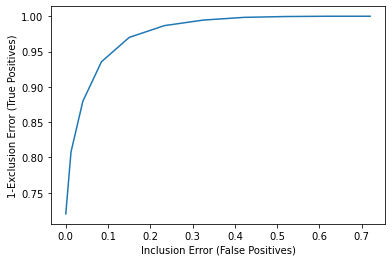

In [341]:
plt.plot(inclusion,1-exclusion)
plt.xlabel('Inclusion Error (False Positives)')
plt.ylabel('1-Exclusion Error (True Positives)')
#plt.ylim([0,1])

plt.savefig('ROCcurves.png')

# We start with traing out some models on the data
We will first make sure again that there are no outliers
We will try out Lasso/ Ridge and afterwards also add k-fold cross validation and do some plotting

In [98]:
# import packages 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [99]:
data_train.isnull().sum().sum() # should be zero

12913

In [100]:
data_train = data_train.dropna(axis = 0)

In [101]:
data_train.isnull().sum().sum().sum()

0

In [102]:
X_train_old = data_train[exogenous_data]
y_train_old = data_train["lnpercapitaconsumption"]

In [103]:
#might be a bit confusing but our training data will be again divided into training and testing data
# so that we can assert some of the hypotheses on the testing data within our big training part

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_old, y_train_old, test_size=0.2, random_state=42)

In [104]:
y_test.to_frame()

,lnpercapitaconsumption
33162,6.217288
45366,5.444049
23679,6.118876
44909,6.420265
23370,6.558080
...,...
41245,4.872386
43731,4.835403
29931,4.943916
30219,6.285006


## Before we start training some models we preallocate some dataframes to put the results there

In [205]:
models = ["OLS", "Lasso", "Ridge","Basis Expansion: Lasso","Basis Expansion: Ridge","Basis Expansion: Ealstic Net","Elastic Net (Lasso + Ridge)", "Random Forest Regressor", "kNN", "Neural Network"]
results = pd.DataFrame(index = models, columns = ["MSE train", "MSE test", "Inclusion Error", "Exclusion Error", "Comments"])
results

,MSE train,MSE test,Inclusion Error,Exclusion Error,Comments
OLS,NaN,NaN,NaN,NaN,NaN
Lasso,NaN,NaN,NaN,NaN,NaN
Ridge,NaN,NaN,NaN,NaN,NaN
Basis Expansion: Lasso,NaN,NaN,NaN,NaN,NaN
Basis Expansion: Ridge,NaN,NaN,NaN,NaN,NaN
Basis Expansion: Ealstic Net,NaN,NaN,NaN,NaN,NaN
Elastic Net (Lasso + Ridge),NaN,NaN,NaN,NaN,NaN
Random Forest Regressor,NaN,NaN,NaN,NaN,NaN
kNN,NaN,NaN,NaN,NaN,NaN
Neural Network,NaN,NaN,NaN,NaN,NaN


In [206]:
# first just to be sure we will again save the normal linear model 

lin_reg = LinearRegression()
MSEs_lin_reg = cross_val_score(lin_reg, X_train, y_train , scoring = "neg_mean_squared_error", cv = 5)
# The cross_val_score will return an array of MSE for each cross-validation steps.
mean_MSE_lin_reg = np.mean(MSEs_lin_reg)

fit = lin_reg.fit(X_train, y_train)
prediction_train = fit.predict(X_train)
prediction = fit.predict(X_test)
residuals = y_test - prediction
print(mean_MSE_lin_reg)
print(np.mean(residuals**2))

-0.19402361371438792
0.18976312741163737


In [207]:
# insert some vaues to the table
from sklearn.metrics import mean_squared_error

results.loc["OLS"] = ([mean_squared_error(y_train, prediction_train),mean_squared_error(y_test, prediction),inex(prediction, y_test,28,incl=True, err = True), inex(prediction, y_test, 28,incl=False, err = True), "n.a."])

results

,MSE train,MSE test,Inclusion Error,Exclusion Error,Comments
OLS,0.192085,0.189763,0.0762955,0.0705623,n.a.
Lasso,NaN,NaN,NaN,NaN,NaN
Ridge,NaN,NaN,NaN,NaN,NaN
Basis Expansion: Lasso,NaN,NaN,NaN,NaN,NaN
Basis Expansion: Ridge,NaN,NaN,NaN,NaN,NaN
Basis Expansion: Ealstic Net,NaN,NaN,NaN,NaN,NaN
Elastic Net (Lasso + Ridge),NaN,NaN,NaN,NaN,NaN
Random Forest Regressor,NaN,NaN,NaN,NaN,NaN
kNN,NaN,NaN,NaN,NaN,NaN
Neural Network,NaN,NaN,NaN,NaN,NaN


(3.0, 9.0)

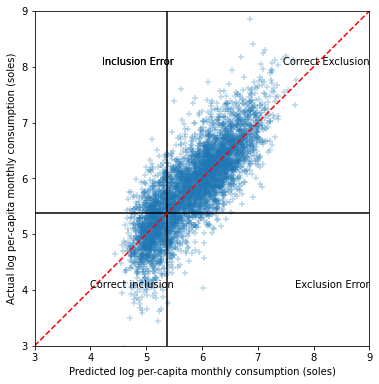

In [271]:
import matplotlib.pyplot as plt

lim_start = 3
lim_end = 9

plt.figure(1,figsize = (6,7))
g=plt.scatter(prediction, y_test, alpha = 0.3, marker = '+')
#g.axes.set_yscale('log')
#g.axes.set_xscale('log')
plt.plot([lim_start, lim_end], [lim_start, lim_end], 'k--', color = 'r')
plt.hlines(np.percentile(prediction,28), lim_start, lim_end)
plt.vlines(np.percentile(prediction,28), lim_start, lim_end)
g.axes.set_xlabel('Predicted log per-capita monthly consumption (soles)')
g.axes.set_ylabel('Actual log per-capita monthly consumption (soles)')
g.axes.axis('equal')
g.axes.axis('square')
plt.text(5.5, 4, 'Correct inclusion',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)
plt.text(5.5, 8, 'Inclusion Error',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)
plt.text(5.5, 8, 'Inclusion Error',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)
plt.text(9, 8, 'Correct Exclusion',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)
plt.text(9, 4, 'Exclusion Error',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)

plt.xlim([lim_start, lim_end])
plt.ylim([lim_start, lim_end])

In [209]:
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {"alpha" :[ 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20] }
ridge_regressor = GridSearchCV(ridge, parameters,scoring = "neg_mean_squared_error", cv = 5 )
mod = ridge_regressor.fit(X_train, y_train)
pred_train = mod.predict(X_train)
pred_test = mod.predict(X_test)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)
print(mean_squared_error(y_train, pred_train))
print(mean_squared_error(y_test, pred_test))

{'alpha': 10}
-0.19362585540139293
0.1920943091433739
0.1898650844509743


In [210]:
results.loc["Ridge"] = ([mean_squared_error(y_train, pred_train),
                         mean_squared_error(y_test, pred_test),
                         inex( pred_test,y_test,28,incl = True, err = True),
                         inex( pred_test,y_test,28,incl = False, err = True), 
                         r'$\alpha = {}$'.format(ridge_regressor.best_params_['alpha'])])
results

,MSE train,MSE test,Inclusion Error,Exclusion Error,Comments
OLS,0.192085,0.189763,0.0762955,0.0705623,n.a.
Lasso,NaN,NaN,NaN,NaN,NaN
Ridge,0.192094,0.189865,0.075634,0.0705623,$\alpha = 10$
Basis Expansion: Lasso,NaN,NaN,NaN,NaN,NaN
Basis Expansion: Ridge,NaN,NaN,NaN,NaN,NaN
Basis Expansion: Ealstic Net,NaN,NaN,NaN,NaN,NaN
Elastic Net (Lasso + Ridge),NaN,NaN,NaN,NaN,NaN
Random Forest Regressor,NaN,NaN,NaN,NaN,NaN
kNN,NaN,NaN,NaN,NaN,NaN
Neural Network,NaN,NaN,NaN,NaN,NaN


(3.0, 9.0)

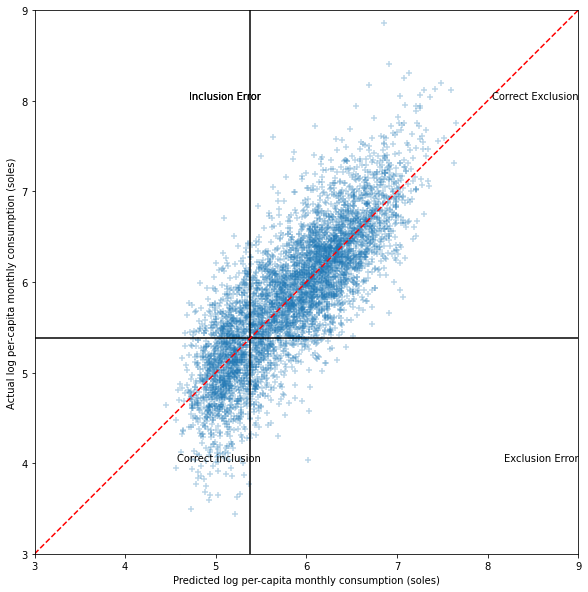

In [211]:
import matplotlib.pyplot as plt

lim_start = 3
lim_end = 9

plt.figure(1,figsize = (12,10))
g=plt.scatter(mod.predict(X_test), y_test, alpha = 0.3, marker = '+')
#g.axes.set_yscale('log')
#g.axes.set_xscale('log')
plt.plot([lim_start, lim_end], [lim_start, lim_end], 'k--', color = 'r')
plt.hlines(np.percentile(prediction,28), lim_start, lim_end)
plt.vlines(np.percentile(prediction,28), lim_start, lim_end)
g.axes.set_xlabel('Predicted log per-capita monthly consumption (soles)')
g.axes.set_ylabel('Actual log per-capita monthly consumption (soles)')
g.axes.axis('equal')
g.axes.axis('square')
plt.text(5.5, 4, 'Correct inclusion',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)
plt.text(5.5, 8, 'Inclusion Error',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)
plt.text(5.5, 8, 'Inclusion Error',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)
plt.text(9, 8, 'Correct Exclusion',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)
plt.text(9, 4, 'Exclusion Error',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)

plt.xlim([lim_start, lim_end])
plt.ylim([lim_start, lim_end])

In [280]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LassoCV, ElasticNet
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

lasso = Lasso(random_state=0, max_iter=10000)
elasticNet = ElasticNet(random_state = 0)
ridge = Ridge()
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(elasticNet, tuned_parameters, cv=n_folds, refit=False)
best_alpha = 0.0001
clf2 = ElasticNet(best_alpha)
mod = clf2.fit(X_train, y_train)
#scores = clf.cv_results_['mean_test_score']
#scores_std = clf.cv_results_['std_test_score']

print(mean_squared_error(y_train, mod.predict(X_train)))
print(mean_squared_error(y_test, mod.predict(X_test)))

0.192096529408757
0.18984590629918996


In [213]:
results.loc["Lasso"] = ([mean_squared_error(y_train,mod.predict(X_train)),
                         mean_squared_error(y_test, mod.predict(X_test)),
                         inex(mod.predict(X_test),y_test,28, incl = True, err = True),
                         inex(mod.predict(X_test),y_test,28, incl = False, err = True),
                         r'$\alpha$ = {}'.format(best_alpha)])
results

,MSE train,MSE test,Inclusion Error,Exclusion Error,Comments
OLS,0.192085,0.189763,0.0762955,0.0705623,n.a.
Lasso,0.192097,0.189846,0.075634,0.0705623,$\alpha$ = 0.0001
Ridge,0.192094,0.189865,0.075634,0.0705623,$\alpha = 10$
Basis Expansion: Lasso,NaN,NaN,NaN,NaN,NaN
Basis Expansion: Ridge,NaN,NaN,NaN,NaN,NaN
Basis Expansion: Ealstic Net,NaN,NaN,NaN,NaN,NaN
Elastic Net (Lasso + Ridge),NaN,NaN,NaN,NaN,NaN
Random Forest Regressor,NaN,NaN,NaN,NaN,NaN
kNN,NaN,NaN,NaN,NaN,NaN
Neural Network,NaN,NaN,NaN,NaN,NaN


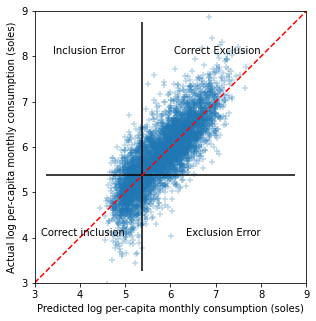

In [285]:
import matplotlib.pyplot as plt

lim_start = 3
lim_end = 9

plt.figure(1,figsize = (5,5))
g=plt.scatter(mod.predict(X_test), y_test, alpha = 0.3, marker = '+')
#g.axes.set_yscale('log')
#g.axes.set_xscale('log')
plt.plot([lim_start, lim_end], [lim_start, lim_end], 'k--', color = 'r')
plt.hlines(np.percentile(prediction,28), lim_start+0.25, lim_end-0.25)
plt.vlines(np.percentile(prediction,28), lim_start+0.25, lim_end-0.25)
g.axes.set_xlabel('Predicted log per-capita monthly consumption (soles)')
g.axes.set_ylabel('Actual log per-capita monthly consumption (soles)')
g.axes.axis('equal')
g.axes.axis('square')
plt.text(5, 4, 'Correct inclusion',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)
plt.text(5, 8, 'Inclusion Error',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)
plt.text(8, 8, 'Correct Exclusion',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)
plt.text(8, 4, 'Exclusion Error',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)

plt.xlim([lim_start, lim_end])
plt.ylim([lim_start, lim_end])

plt.savefig('inex_Lasso.png')

In [ ]:
import matplotlib.pyplot as plt

lim_start = 3
lim_end = 9
plt.figure(1,figsize = (5,5))
g=plt.scatter(mod.predict(X_test), data_train.dropna(axis=0)["lnpercapitaconsumption"],alpha = 0.3, marker = '+')
#g.axes.set_yscale('log')
#g.axes.set_xscale('log')
plt.plot([lim_start, lim_end], [lim_start, lim_end], 'k--', color = 'r')
plt.hlines(np.percentile(y_predicted,28), lim_start+0.25, lim_end-0.25)
plt.vlines(np.percentile(y_predicted,28), lim_start+0.25, lim_end-0.25)
g.axes.set_xlabel('Predicted log per-capita monthly consumption (soles)')
g.axes.set_ylabel('Actual log per-capita monthly consumption (soles)')
g.axes.axis('equal')
g.axes.axis('square')
plt.text(5, 4, 'Correct inclusion',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)
plt.text(5, 8, 'Inclusion Error',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)
plt.text(8, 8, 'Correct Exclusion',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)
plt.text(8, 4, 'Exclusion Error',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)

plt.xlim([lim_start, lim_end])
plt.ylim([lim_start, lim_end])

plt.savefig('inex_OLS.png')

## Lets try some kNN Regression

In [214]:
from sklearn.neighbors import KNeighborsRegressor

k = 4
weights = "uniform" # or "uniform" or "distance"
knnmodel = KNeighborsRegressor(n_neighbors = k, weights = weights)
fit = knnmodel.fit(X_train,y_train)
knn_prediction = knnmodel.predict(X_test)

In [215]:
# print kNN regression MSEs
print(mean_squared_error(y_train, knnmodel.predict(X_train)))
print(mean_squared_error(y_test, knnmodel.predict(X_test)))

0.14500226166785263
0.23569485470119544


In [216]:
results.loc["kNN"] = ([mean_squared_error(y_train, knnmodel.predict(X_train)),
                       mean_squared_error(y_test, knnmodel.predict(X_test)),
                       inex(knnmodel.predict(X_test),y_test,28, incl = True, err = True),
                       inex(knnmodel.predict(X_test),y_test,28, incl = False, err = True),
                       'k = {}, weights = uniform'.format(k) ])
results

,MSE train,MSE test,Inclusion Error,Exclusion Error,Comments
OLS,0.192085,0.189763,0.0762955,0.0705623,n.a.
Lasso,0.192097,0.189846,0.075634,0.0705623,$\alpha$ = 0.0001
Ridge,0.192094,0.189865,0.075634,0.0705623,$\alpha = 10$
Basis Expansion: Lasso,NaN,NaN,NaN,NaN,NaN
Basis Expansion: Ridge,NaN,NaN,NaN,NaN,NaN
Basis Expansion: Ealstic Net,NaN,NaN,NaN,NaN,NaN
Elastic Net (Lasso + Ridge),NaN,NaN,NaN,NaN,NaN
Random Forest Regressor,NaN,NaN,NaN,NaN,NaN
kNN,0.145002,0.235695,0.0886439,0.0800441,"k = 4, weights = uniform"
Neural Network,NaN,NaN,NaN,NaN,NaN


## Random Forest Regressor

In [217]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [218]:
regr = RandomForestRegressor(max_depth = 20, random_state = 0, max_features = 'sqrt', n_estimators = 500)
model = regr.fit(X_train, y_train)
print(mean_squared_error(y_train, model.predict(X_train)))
print(mean_squared_error(y_test, model.predict(X_test)))

0.07376943193435834
0.19265546942143097


In [219]:
results.loc["Random Forest Regressor"] = ([mean_squared_error(y_train, model.predict(X_train)),
                                           mean_squared_error(y_test, model.predict(X_test)),
                                           inex(model.predict(X_test),y_test, 28, incl = True, err = True),
                                           inex(model.predict(X_test),y_test, 28, incl = False, err = True), 
                                           'max_depth = 20, n_estimators = 500'])
results

,MSE train,MSE test,Inclusion Error,Exclusion Error,Comments
OLS,0.192085,0.189763,0.0762955,0.0705623,n.a.
Lasso,0.192097,0.189846,0.075634,0.0705623,$\alpha$ = 0.0001
Ridge,0.192094,0.189865,0.075634,0.0705623,$\alpha = 10$
Basis Expansion: Lasso,NaN,NaN,NaN,NaN,NaN
Basis Expansion: Ridge,NaN,NaN,NaN,NaN,NaN
Basis Expansion: Ealstic Net,NaN,NaN,NaN,NaN,NaN
Elastic Net (Lasso + Ridge),NaN,NaN,NaN,NaN,NaN
Random Forest Regressor,0.0737694,0.192655,0.0734289,0.0738699,"max_depth = 20, n_estimators = 500"
kNN,0.145002,0.235695,0.0886439,0.0800441,"k = 4, weights = uniform"
Neural Network,NaN,NaN,NaN,NaN,NaN


## Elastic Net

In [220]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [221]:
netmodel = ElasticNetCV(random_state = 0)
netmodel.fit(X_train,y_train)
print(mean_squared_error(y_train, netmodel.predict(X_train)))
print(mean_squared_error(y_test, netmodel.predict(X_test)))

0.19223435859857385
0.190117484747322


In [240]:
netmodel.l1_ratio_

0.5

In [241]:
results.loc["Elastic Net (Lasso + Ridge)"] = ([mean_squared_error(y_train, netmodel.predict(X_train)),
                                           mean_squared_error(y_test, netmodel.predict(X_test)),
                                           inex(netmodel.predict(X_test),y_test, 28, incl = True, err = True),
                                           inex(netmodel.predict(X_test),y_test, 28, incl = False, err = True), 
                                           r'$\alpha$ = {}, l1 ratio = 0.5'.format(netmodel.alpha_)])
results

,MSE train,MSE test,Inclusion Error,Exclusion Error,Comments
OLS,0.192085,0.189763,0.0762955,0.0705623,n.a.
Lasso,0.192097,0.189846,0.075634,0.0705623,$\alpha$ = 0.0001
Ridge,0.192094,0.189865,0.075634,0.0705623,$\alpha = 10$
Basis Expansion: Lasso,0.174723,0.182318,0.0725469,0.0674752,$\alpha$ = 0.0003039195382313198
Basis Expansion: Ridge,0.160542,0.201494,0.0780595,0.0721058,$\alpha$ = 0.31622776601683794
Basis Expansion: Ealstic Net,0.173177,0.182504,0.0732084,0.0681367,$\alpha$ = 0.0018957356524063754
Elastic Net (Lasso + Ridge),0.192234,0.190117,0.0758545,0.0710033,"$\alpha$ = 0.0004306403360326911, l1 ratio = 0.5"
Random Forest Regressor,0.0737694,0.192655,0.0734289,0.0738699,"max_depth = 20, n_estimators = 500"
kNN,0.145002,0.235695,0.0886439,0.0800441,"k = 4, weights = uniform"
Neural Network,0.136319,0.213246,0.0771775,0.0855568,"activation = RELU, 1 Hidden Layer"


## Neural Networks: MLP

In [223]:
from sklearn.neural_network import MLPRegressor

mlpmodel = MLPRegressor(random_state = 0, activation = 'relu', hidden_layer_sizes = (100,), learning_rate = 'adaptive')
mlpmodel.fit(X_train, y_train)
print(mean_squared_error(y_train, mlpmodel.predict(X_train)))
print(mean_squared_error(y_test, mlpmodel.predict(X_test)))

0.13631903790790226
0.213245978967395


In [224]:
results.loc["Neural Network"] = ([mean_squared_error(y_train, mlpmodel.predict(X_train)),
                                           mean_squared_error(y_test, mlpmodel.predict(X_test)),
                                           inex(mlpmodel.predict(X_test),y_test, 28, incl = True, err = True),
                                           inex(mlpmodel.predict(X_test),y_test, 28, incl = False, err = True), 
                                           'activation = RELU, 1 Hidden Layer'])
results

,MSE train,MSE test,Inclusion Error,Exclusion Error,Comments
OLS,0.192085,0.189763,0.0762955,0.0705623,n.a.
Lasso,0.192097,0.189846,0.075634,0.0705623,$\alpha$ = 0.0001
Ridge,0.192094,0.189865,0.075634,0.0705623,$\alpha = 10$
Basis Expansion: Lasso,NaN,NaN,NaN,NaN,NaN
Basis Expansion: Ridge,NaN,NaN,NaN,NaN,NaN
Basis Expansion: Ealstic Net,NaN,NaN,NaN,NaN,NaN
Elastic Net (Lasso + Ridge),0.192234,0.190117,0.0758545,0.0710033,n.a.
Random Forest Regressor,0.0737694,0.192655,0.0734289,0.0738699,"max_depth = 20, n_estimators = 500"
kNN,0.145002,0.235695,0.0886439,0.0800441,"k = 4, weights = uniform"
Neural Network,0.136319,0.213246,0.0771775,0.0855568,"activation = RELU, 1 Hidden Layer"


## Lasso Best

In [ ]:
results.loc["Basis Expansion: Lasso"]

In [246]:
import pickle

with open('./lassobest.pkl', 'rb') as whatever:
    lassobest = pickle.load(whatever)

with open('./ridgebest.pkl', 'rb') as whatever:
    ridgebest = pickle.load(whatever)
    
with open('./elbest.pkl', 'rb') as whatever:
    elbest = pickle.load(whatever)

elbest.best_estimator_.l1_ratio

0.1

In [226]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, interaction_only = True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)


ridgebest.predict(X_train_poly)


array([5.1258105 , 6.17737092, 5.21641573, ..., 6.21343063, 5.89877074,
       6.02478835])

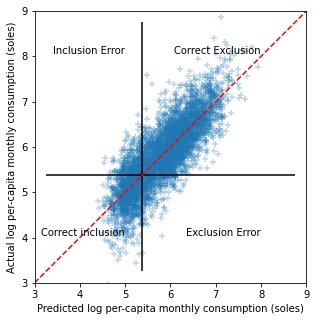

In [287]:
import matplotlib.pyplot as plt

lim_start = 3
lim_end = 9

plt.figure(1,figsize = (5,5))
g=plt.scatter(lassobest.predict(X_test_poly), y_test, alpha = 0.3, marker = '+')
#g.axes.set_yscale('log')
#g.axes.set_xscale('log')
plt.plot([lim_start, lim_end], [lim_start, lim_end], 'k--', color = 'r')
plt.hlines(np.percentile(prediction,28), lim_start+0.25, lim_end-0.25)
plt.vlines(np.percentile(prediction,28), lim_start+0.25, lim_end-0.25)
g.axes.set_xlabel('Predicted log per-capita monthly consumption (soles)')
g.axes.set_ylabel('Actual log per-capita monthly consumption (soles)')
g.axes.axis('equal')
g.axes.axis('square')
plt.text(5, 4, 'Correct inclusion',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)
plt.text(5, 8, 'Inclusion Error',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)
plt.text(8, 8, 'Correct Exclusion',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)
plt.text(8, 4, 'Exclusion Error',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)

plt.xlim([lim_start, lim_end])
plt.ylim([lim_start, lim_end])

plt.savefig('inex_BESTLasso.png')

In [227]:
results.loc["Basis Expansion: Lasso"] = ([mean_squared_error(y_train, lassobest.predict(X_train_poly)),
                                           mean_squared_error(y_test, lassobest.predict(X_test_poly)),
                                           inex(lassobest.predict(X_test_poly),y_test, 28, incl = True, err = True),
                                           inex(lassobest.predict(X_test_poly),y_test, 28, incl = False, err = True), 
                                           r'$\alpha$ = {}'.format(lassobest.alpha)])
results

,MSE train,MSE test,Inclusion Error,Exclusion Error,Comments
OLS,0.192085,0.189763,0.0762955,0.0705623,n.a.
Lasso,0.192097,0.189846,0.075634,0.0705623,$\alpha$ = 0.0001
Ridge,0.192094,0.189865,0.075634,0.0705623,$\alpha = 10$
Basis Expansion: Lasso,0.174723,0.182318,0.0725469,0.0674752,$\alpha$ = 0.0003039195382313198
Basis Expansion: Ridge,NaN,NaN,NaN,NaN,NaN
Basis Expansion: Ealstic Net,NaN,NaN,NaN,NaN,NaN
Elastic Net (Lasso + Ridge),0.192234,0.190117,0.0758545,0.0710033,n.a.
Random Forest Regressor,0.0737694,0.192655,0.0734289,0.0738699,"max_depth = 20, n_estimators = 500"
kNN,0.145002,0.235695,0.0886439,0.0800441,"k = 4, weights = uniform"
Neural Network,0.136319,0.213246,0.0771775,0.0855568,"activation = RELU, 1 Hidden Layer"


In [228]:
results.loc["Basis Expansion: Ridge"] = ([mean_squared_error(y_train, ridgebest.predict(X_train_poly)),
                                           mean_squared_error(y_test, ridgebest.predict(X_test_poly)),
                                           inex(ridgebest.predict(X_test_poly),y_test, 28, incl = True, err = True),
                                           inex(ridgebest.predict(X_test_poly),y_test, 28, incl = False, err = True), 
                                           r'$\alpha$ = {}'.format(ridgebest.best_estimator_.alpha)])
results

,MSE train,MSE test,Inclusion Error,Exclusion Error,Comments
OLS,0.192085,0.189763,0.0762955,0.0705623,n.a.
Lasso,0.192097,0.189846,0.075634,0.0705623,$\alpha$ = 0.0001
Ridge,0.192094,0.189865,0.075634,0.0705623,$\alpha = 10$
Basis Expansion: Lasso,0.174723,0.182318,0.0725469,0.0674752,$\alpha$ = 0.0003039195382313198
Basis Expansion: Ridge,0.160542,0.201494,0.0780595,0.0721058,$\alpha$ = 0.31622776601683794
Basis Expansion: Ealstic Net,NaN,NaN,NaN,NaN,NaN
Elastic Net (Lasso + Ridge),0.192234,0.190117,0.0758545,0.0710033,n.a.
Random Forest Regressor,0.0737694,0.192655,0.0734289,0.0738699,"max_depth = 20, n_estimators = 500"
kNN,0.145002,0.235695,0.0886439,0.0800441,"k = 4, weights = uniform"
Neural Network,0.136319,0.213246,0.0771775,0.0855568,"activation = RELU, 1 Hidden Layer"


In [247]:
results.loc["Basis Expansion: Ealstic Net"] = ([mean_squared_error(y_train, elbest.predict(X_train_poly)),
                                           mean_squared_error(y_test, elbest.predict(X_test_poly)),
                                           inex(elbest.predict(X_test_poly),y_test, 28, incl = True, err = True),
                                           inex(elbest.predict(X_test_poly),y_test, 28, incl = False, err = True), 
                                           r'$\alpha$ = {}, l1 ratio = 0.1'.format(elbest.best_estimator_.alpha)])
results

,MSE train,MSE test,Inclusion Error,Exclusion Error,Comments
OLS,0.192085,0.189763,0.0762955,0.0705623,n.a.
Lasso,0.192097,0.189846,0.075634,0.0705623,$\alpha$ = 0.0001
Ridge,0.192094,0.189865,0.075634,0.0705623,$\alpha = 10$
Basis Expansion: Lasso,0.174723,0.182318,0.0725469,0.0674752,$\alpha$ = 0.0003039195382313198
Basis Expansion: Ridge,0.160542,0.201494,0.0780595,0.0721058,$\alpha$ = 0.31622776601683794
Basis Expansion: Ealstic Net,0.173177,0.182504,0.0732084,0.0681367,"$\alpha$ = 0.0018957356524063754, l1 ratio = 0.1"
Elastic Net (Lasso + Ridge),0.192234,0.190117,0.0758545,0.0710033,"$\alpha$ = 0.0004306403360326911, l1 ratio = 0.5"
Random Forest Regressor,0.0737694,0.192655,0.0734289,0.0738699,"max_depth = 20, n_estimators = 500"
kNN,0.145002,0.235695,0.0886439,0.0800441,"k = 4, weights = uniform"
Neural Network,0.136319,0.213246,0.0771775,0.0855568,"activation = RELU, 1 Hidden Layer"


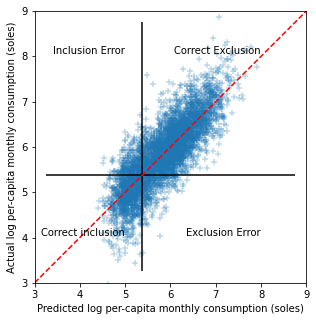

In [288]:
import matplotlib.pyplot as plt

lim_start = 3
lim_end = 9

plt.figure(1,figsize = (5,5))
g=plt.scatter(elbest.predict(X_test_poly), y_test, alpha = 0.3, marker = '+')
#g.axes.set_yscale('log')
#g.axes.set_xscale('log')
plt.plot([lim_start, lim_end], [lim_start, lim_end], 'k--', color = 'r')
plt.hlines(np.percentile(prediction,28), lim_start+0.25, lim_end-0.25)
plt.vlines(np.percentile(prediction,28), lim_start+0.25, lim_end-0.25)
g.axes.set_xlabel('Predicted log per-capita monthly consumption (soles)')
g.axes.set_ylabel('Actual log per-capita monthly consumption (soles)')
g.axes.axis('equal')
g.axes.axis('square')
plt.text(5, 4, 'Correct inclusion',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)
plt.text(5, 8, 'Inclusion Error',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)
plt.text(8, 8, 'Correct Exclusion',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)
plt.text(8, 4, 'Exclusion Error',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)

plt.xlim([lim_start, lim_end])
plt.ylim([lim_start, lim_end])

plt.savefig('inex_BESTElasticNet.png')

In [ ]:
X_train

In [251]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2score

OLSbe = LinearRegression().fit(X_train_poly, y_train)

mean_squared_error(y_train, OLSbe.predict(X_train_poly))
mean_squared_error(y_test, OLSbe.predict(X_test_poly))

5.3360476109265286e+20

In [254]:
OLSbe.score(X_train_poly,y_train)dd

0.7106253138422169

### Convert to LaTEX

In [266]:
results.to_latex('models.tex', label = 'models')

In [138]:
import pickle
with open('./models.tex', 'w') as something:
    pickle.dump(results.to_latex(), something)
